# mehmetfatihdata

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [2]:
education = pd.read_csv("education.csv",index_col=0)

# Q1:
Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

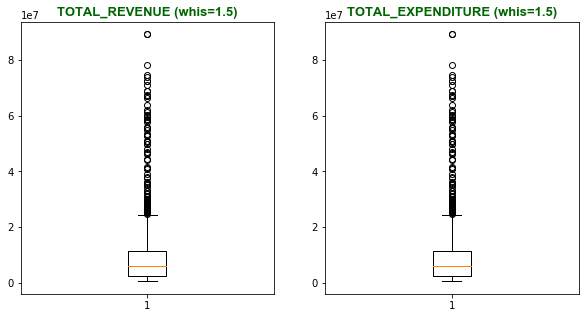

In [3]:
baslik_font = {'family': 'arial', 'color': 'darkgreen','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
fig=plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(education["TOTAL_REVENUE"], )
plt.title("TOTAL_REVENUE (whis=1.5)", fontdict=baslik_font)
plt.subplot(1,2,2)
plt.boxplot(education["TOTAL_REVENUE"], )
plt.title("TOTAL_EXPENDITURE (whis=1.5)", fontdict=baslik_font)
plt.show()

In [4]:
from scipy.stats import zscore

z_scores = zscore(education["TOTAL_REVENUE"])
for threshold in range(1,6):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 142
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 57
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 42
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 28
------
Eşik değeri: 5
Aykırı değerlerin sayısı: 14
------


In [5]:
q75, q25 = np.percentile(education["TOTAL_REVENUE"], [75 ,25])
caa = q75 - q25

In [6]:
degerler = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi'])
for esik_degeri in np.arange(1,10):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((education["TOTAL_REVENUE"] > maks_deger)| 
                                       (education["TOTAL_REVENUE"] < min_deger))[0]))
    degerler = degerler.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
degerler

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayısı
0,1.0,NaN,146.0
1,2.0,NaN,74.0
2,3.0,NaN,48.0
3,4.0,NaN,39.0
4,5.0,NaN,27.0
5,6.0,NaN,14.0
6,7.0,NaN,5.0
7,8.0,NaN,2.0
8,9.0,NaN,0.0


# Q2:
Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.


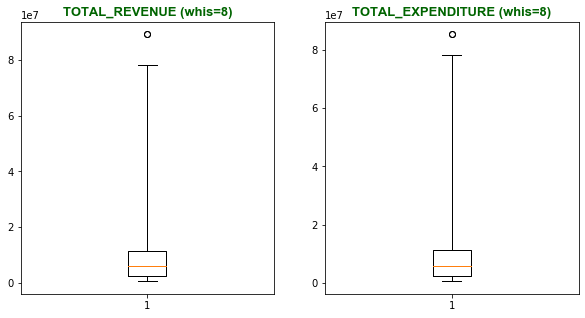

In [7]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(education["TOTAL_REVENUE"], whis=8)
plt.title("TOTAL_REVENUE (whis=8)", fontdict=baslik_font)
plt.subplot(1,2,2)
plt.boxplot(education["TOTAL_EXPENDITURE"], whis=8)
plt.title("TOTAL_EXPENDITURE (whis=8)", fontdict=baslik_font)
plt.show()

In [8]:
z_scores = zscore(education["TOTAL_REVENUE"])
threshold =8
print("Eşik değeri: {}".format(threshold))
print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
print('------')

Eşik değeri: 8
Aykırı değerlerin sayısı: 0
------


In [9]:
from scipy.stats.mstats import winsorize

W_REVENUE= winsorize(education["TOTAL_REVENUE"], (0, 0.08))
W_EXPENDITURE= winsorize(education["TOTAL_EXPENDITURE"], (0, 0.08))


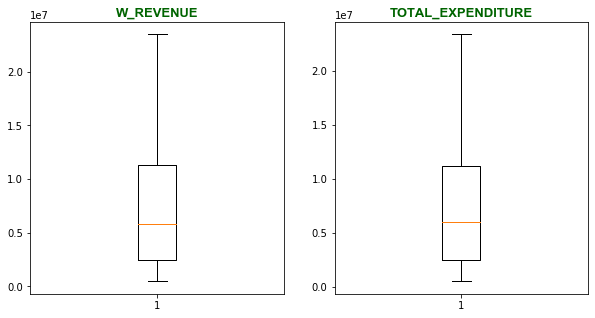

In [10]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(W_REVENUE)
plt.title("W_REVENUE", fontdict=baslik_font)
plt.subplot(1,2,2)
plt.boxplot(W_EXPENDITURE)
plt.title("TOTAL_EXPENDITURE", fontdict=baslik_font)
plt.show()

# Q3:
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.


In [11]:
education["BUDGET_DEFİCİT"]=education['TOTAL_REVENUE']-education['TOTAL_EXPENDITURE']
education.head(1)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFİCİT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,25087.0


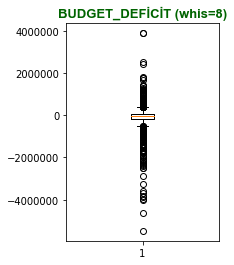

In [12]:
plt.subplot(1,2,1)
plt.boxplot(education["BUDGET_DEFİCİT"], whis=1.5)
plt.title("BUDGET_DEFİCİT (whis=8)", fontdict=baslik_font)
plt.show()

In [13]:
W_BUDGET_DEFİCİT = winsorize(education["BUDGET_DEFİCİT"], (0.09, 0.07))

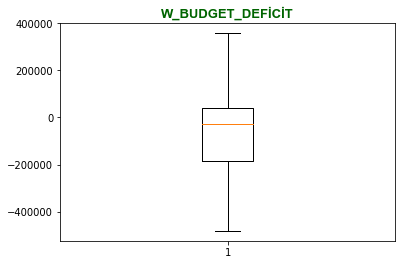

In [14]:
plt.boxplot(W_BUDGET_DEFİCİT)
plt.title("W_BUDGET_DEFİCİT", fontdict=baslik_font)
plt.show()

# Q4: 
Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

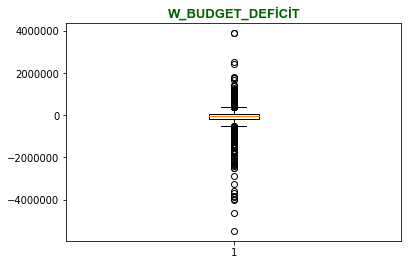

In [17]:
education["W_BUDGET_DEFİCİT"]=winsorize(education["TOTAL_REVENUE"])-winsorize(education["TOTAL_EXPENDITURE"])
plt.boxplot(education["W_BUDGET_DEFİCİT"])
plt.title("W_BUDGET_DEFİCİT", fontdict=baslik_font)
plt.show()

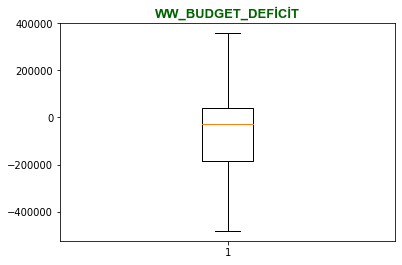

In [25]:
WW_BUDGET_DEFİCİT = winsorize(education["W_BUDGET_DEFİCİT"], (0.09, 0.07))
plt.boxplot(WW_BUDGET_DEFİCİT)
plt.title("WW_BUDGET_DEFİCİT", fontdict=baslik_font)
plt.show()

In [63]:
education["WW_BUDGET_DEFİCİT"]=WW_BUDGET_DEFİCİT 
education

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFİCİT,W_BUDGET_DEFİCİT,WW_BUDGET_DEFİCİT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,25087.0,25087.0,25087.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712,77103.0,77103.0,77103.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,-143501.0,-143501.0,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,-31063.0,-31063.0,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067,-878807.0,-878807.0,-482442.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1283493.0,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,...,772414.0,386781.0,1192648.0,248.041059,290.081407,227.598382,273.402640,-238246.0,-238246.0,-238246.0
1488,2017_WASHINGTON,WASHINGTON,2017,1083973.0,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,...,656797.0,336808.0,1007338.0,241.701001,289.131257,223.123409,267.744778,-288932.0,-288932.0,-288932.0
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,276764.0,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,...,162070.0,80142.0,257289.0,236.057019,273.415854,217.316396,271.617023,25013.0,25013.0,25013.0
1490,2017_WISCONSIN,WISCONSIN,2017,857736.0,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,...,489919.0,263896.0,809722.0,240.389213,288.143144,219.612694,258.700304,-90069.0,-90069.0,-90069.0


# Q5: 
Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

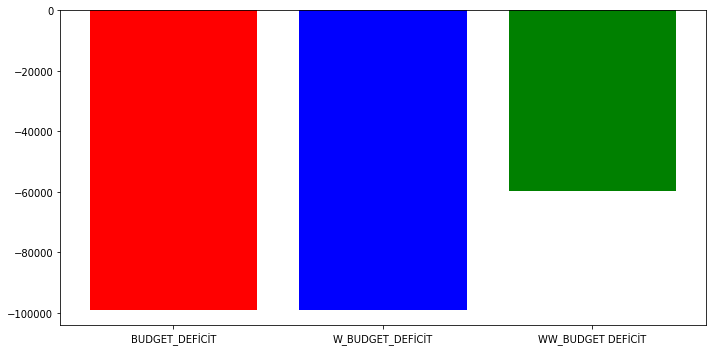

In [74]:
fig=plt.figure(figsize=(10,5))

df=pd.concat([education["BUDGET_DEFİCİT"], education["W_BUDGET_DEFİCİT"], education["WW_BUDGET_DEFİCİT"]], axis=1)
plt.bar(["BUDGET_DEFİCİT","W_BUDGET_DEFİCİT","WW_BUDGET DEFİCİT"],df.mean(),color=["red","blue","green"])
    
plt.tight_layout()
plt.show()

# Q6: 
Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

Winsorize alınan değişkenlerden elde edilen winsorize bütçe açığı orjinal değerden farklı bir sonuç ortaya çıkarmaktadır. Bu yüzden winsorize edilmemiş olan orjinal değerlerden elde edilen bütçe açığı winsorize edilerek kullanılmalıdır.

"Cevap 4"
----

BİTTİ.